In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cosima_cookbook as cc
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import pandas as pd
import netCDF4 as nc

In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
configuration = 'mom01v5'
#configuration = 'mom025'

expts = cc.get_experiments(configuration)
display(expts)

['GFDL50',
 'KDS75',
 'KDS75_PI',
 'KDS75_UP',
 'KDS75_WOA13',
 'KDS75_newbathy_CORE',
 'KDS75_newbathy_JRA',
 'KDS75_salt10days',
 'KDS75_saltfluxes',
 'KDS75_wind']

In [4]:
ncfile = 'ocean.nc'
#expt = 'mom025_jra_ryf9091'
expt = 'KDS75_newbathy_JRA' 

In [5]:
## Load ssh from expt, pick up one year 
tmp = cc.get_nc_variable(expt, 'ocean.nc', 'sea_level',n=9, time_units = 'days since 1900-01-01')
ssh = tmp.sel(time=slice('1902-01','1902-12')).mean('time')
ssh_std = tmp.sel(time=slice('1902-01','1902-12')).std('time')
del(tmp)

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=9), HTML(value='')))

In [11]:
lon = cc.get_nc_variable(expt, 'ocean.nc', 'xt_ocean',n=1, time_units = 'days since 1900-01-01').isel(time=0) 
lat = cc.get_nc_variable(expt, 'ocean.nc', 'yt_ocean',n=1, time_units = 'days since 1900-01-01').isel(time=0) 
lon = np.array(lon, dtype=int)
lon_std = lon
ssh, lon = shiftgrid(0., ssh, lon, start=True)
ssh_std, lon_std = shiftgrid(0., ssh_std, lon_std, start=True)

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=1), HTML(value='')))

In [7]:
obs_file = nc.Dataset('/g/data3/hh5/tmp/cosima/observations/original/zos_AVISO_L4_199210-201012.nc')
ssh_obs = obs_file.variables['zos'][3:]
lat_obs = obs_file.variables['lat'][:]
lon_obs = obs_file.variables['lon'][:]
ssh_obs.shape

(216, 180, 360)

In [8]:
m_ssh_obs = np.mean(ssh_obs,axis=0)
ssh_std_obs = np.std(ssh_obs,axis=0)

Text(0.5,1,'AVISO SSH std.')

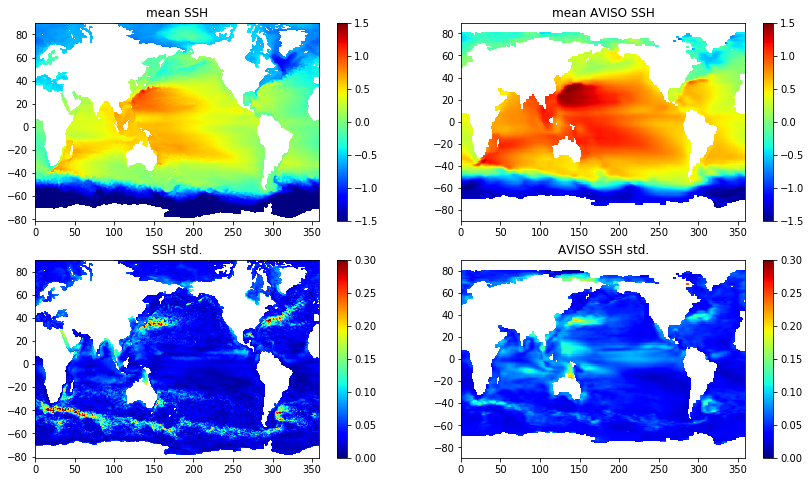

In [9]:
fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(2, 2, 1)
cax1 = ax1.pcolormesh(lon, lat, ssh, shading='flat', cmap=plt.cm.jet, vmin=-1.5, vmax=1.5)
fig.colorbar(cax1)
#cbar.outline.set_linewidth(1)
plt.title('mean SSH', fontsize=12)

ax2 = fig.add_subplot(2, 2, 2)
cax2 = ax2.pcolormesh(lon_obs, lat_obs, m_ssh_obs, shading='flat', cmap=plt.cm.jet, vmin=-1.5, vmax=1.5)
fig.colorbar(cax2)
#cbar.outline.set_linewidth(1)
plt.title('mean AVISO SSH', fontsize=12)

ax3 = fig.add_subplot(2, 2, 3)
cax3 = ax3.pcolormesh(lon, lat, ssh_std, shading='flat', cmap=plt.cm.jet, vmin=0.0, vmax=0.3)
fig.colorbar(cax3)
#cbar.outline.set_linewidth(1)
plt.title('SSH std.', fontsize=12)

ax4 = fig.add_subplot(2, 2, 4)
cax4 = ax4.pcolormesh(lon_obs, lat_obs, ssh_std_obs, shading='flat', cmap=plt.cm.jet, vmin=0.0, vmax=0.3)
fig.colorbar(cax4)
#cbar.outline.set_linewidth(1)
plt.title('AVISO SSH std.', fontsize=12)